<a href="https://colab.research.google.com/github/welashi/ANN/blob/main/nn5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сверточные нейронные сети CNN

In [1]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras
# библиотека базы выборок Mnist
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print(x_train.shape)

model = keras.Sequential([
    Conv2D(32, (3, 3), padding='same',
           activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


his = model.fit(x_train, y_train_cat, batch_size=32,
                epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
Epoch 1/5
1500/1500 [==============================] - 86s 56ms/step - loss: 0.1409 - accuracy: 0.9570 - val_loss: 0.0579 - val_accuracy: 0.9828
Epoch 2/5
1500/1500 [==============================] - 75s 50ms/step - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.0491 - val_accuracy: 0.9854
Epoch 3/5
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.0476 - val_accuracy: 0.9863
Epoch 4/5
1500/1500 [==============================] - 74s 49ms/step - loss: 0.0224 - accuracy: 0.9928 - val_loss: 0.0505 - val_accuracy: 0.9858
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 0.0353 - accuracy: 0.9898


[0.03534068167209625, 0.989799976348877]

In [2]:
# вывод структуры ИНС
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

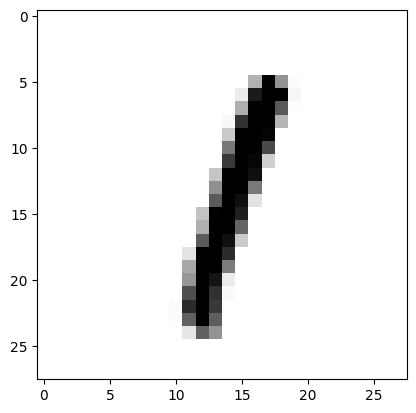

1/1 [==============================] - 0s 113ms/step
[[1.4167985e-08 9.9963379e-01 3.9031991e-09 4.7772420e-12 8.7709827e-07
  1.1879860e-09 5.6966094e-09 3.6437603e-04 5.4537139e-07 3.2422727e-07]]
1


In [3]:
n = 5
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )